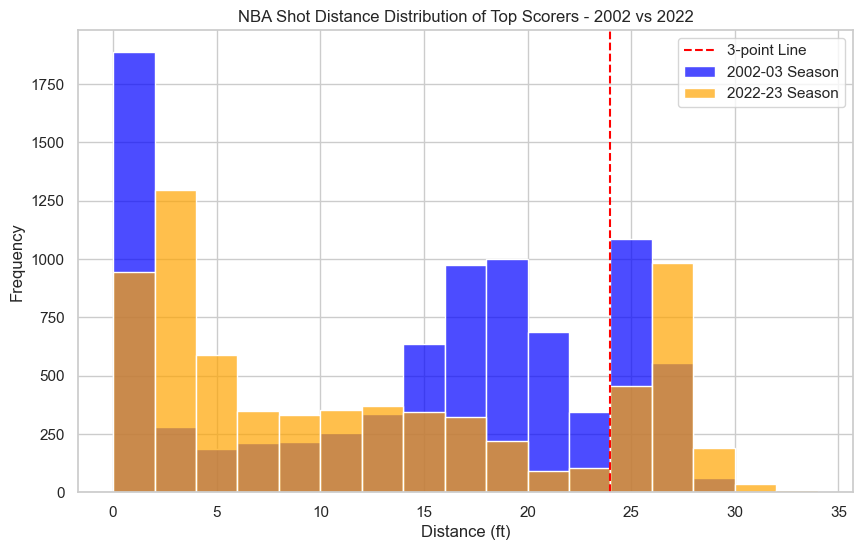

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


df = pd.read_csv('CombinedShotData.csv')
df['Distance (ft)'] = df['Distance (ft)'].astype(int)

# Filter data for the 2002 season
season_2002 = df[df['Season'] == 2002]

# Filter data for the 2022 season
season_2022 = df[df['Season'] == 2022]

sns.set(style="whitegrid")

bin_edges = range(0, 36, 2)
plt.figure(figsize=(10, 6))

# Plot the histogram for the 2002 season with custom bins
sns.histplot(season_2002['Distance (ft)'], bins=bin_edges, kde=False, color='blue', label='2002-03 Season', alpha=0.7)

# Overlay the histogram for the 2022 season with custom bins
sns.histplot(season_2022['Distance (ft)'], bins=bin_edges, kde=False, color='orange', label='2022-23 Season', alpha=0.7)


plt.axvline(x=24, color='red', linestyle='--', label='3-point Line')

# Set labels and title
plt.xlabel('Distance (ft)')
plt.ylabel('Frequency')
plt.title('NBA Shot Distance Distribution of Top Scorers - 2002 vs 2022')

plt.legend()

plt.show()
df = pd.read_csv('CombinedShotData.csv')

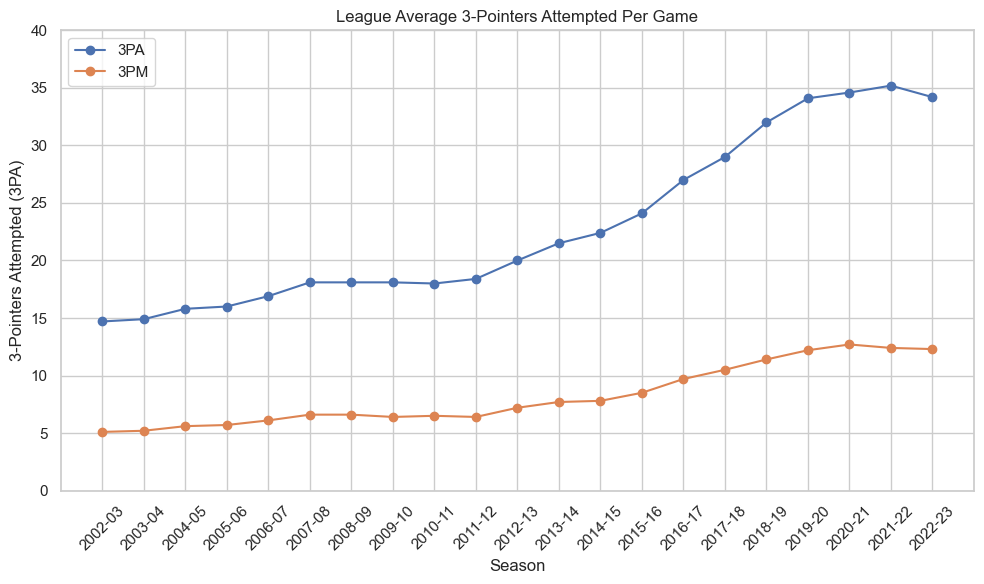

In [14]:
import matplotlib.pyplot as plt

df = pd.read_csv('LeagueStats.csv')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['3PA'], marker='o', linestyle='-', label='3PA')
plt.plot(df['Season'], df['3P'], marker='o', linestyle='-', label='3PM')

max_value = 40
plt.ylim(0, max_value)

plt.title('League Average 3-Pointers Attempted Per Game')
plt.xlabel('Season')
plt.ylabel('3-Pointers Attempted (3PA)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().invert_xaxis()

plt.legend()

# Show the plot
plt.show()


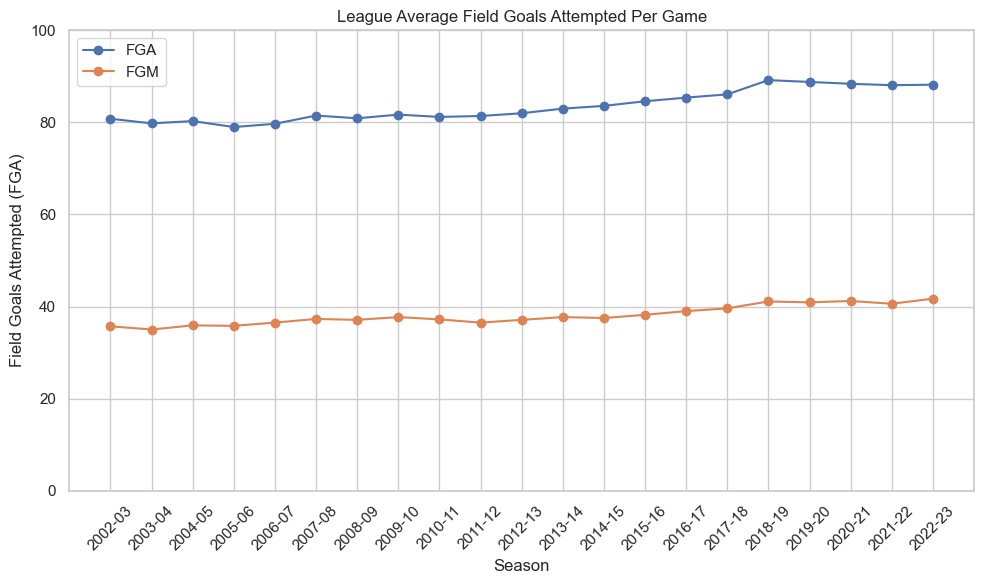

In [15]:
import matplotlib.pyplot as plt

df = pd.read_csv('LeagueStats.csv')

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(df['Season'], df['FGA'], marker='o', linestyle='-', label='FGA')
plt.plot(df['Season'], df['FG'], marker='o', linestyle='-', label='FGM')

max_value = 100
plt.ylim(0, max_value)

plt.title('League Average Field Goals Attempted Per Game')
plt.xlabel('Season')
plt.ylabel('Field Goals Attempted (FGA)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.gca().invert_xaxis()

plt.legend()

# Show the plot
plt.show()


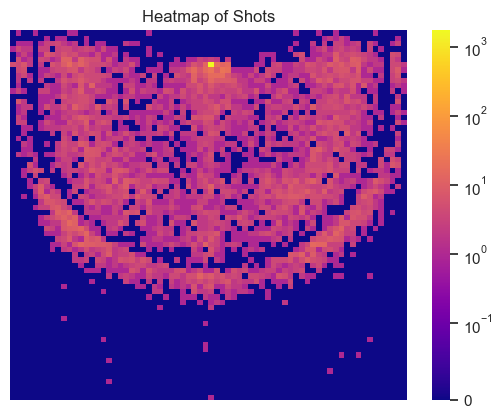

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize 
from matplotlib.colors import SymLogNorm # Import LogNorm from matplotlib.colors

# Assuming your data is stored in a CSV file named 'shot_data.csv'
df = pd.read_csv('2002ShotData.csv')

# Increase the number of bins for a smoother heatmap
heatmap, xedges, yedges = np.histogram2d(df['Top'], df['Left'], bins=(70, 70))

# Choose a colormap with softer color transitions
cmap = 'plasma'

# Adjust color normalization for a more gradual transition
sns.heatmap(heatmap, cmap=cmap, norm=SymLogNorm(linthresh=0.1),  
            xticklabels=False,
            yticklabels=False)


plt.title('Heatmap of Shots')
plt.show()




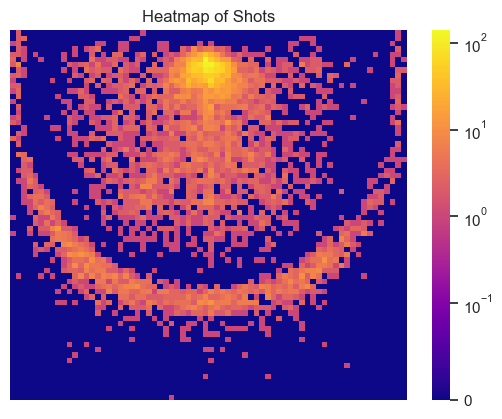

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize 
from matplotlib.colors import SymLogNorm # Import LogNorm from matplotlib.colors

# Assuming your data is stored in a CSV file named 'shot_data.csv'
df = pd.read_csv('2022ShotData.csv')

# Increase the number of bins for a smoother heatmap
heatmap, xedges, yedges = np.histogram2d(df['Top'], df['Left'], bins=(70, 70))

# Choose a colormap with softer color transitions
cmap = 'plasma'

# Adjust color normalization for a more gradual transition
sns.heatmap(heatmap, cmap=cmap, norm=SymLogNorm(linthresh=0.1),  
            xticklabels=False,
            yticklabels=False)


plt.title('Heatmap of Shots')
plt.show()

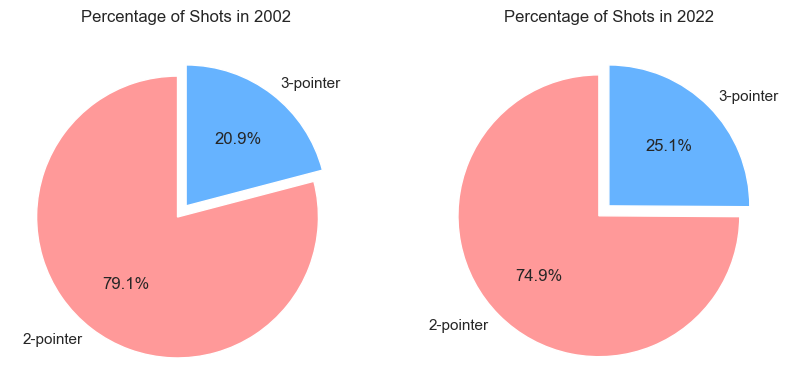

In [18]:

def calculate_percentage(df):
    total_shots = len(df)
    two_pointers = len(df[df['ShotType'] == '2-pointer'])
    three_pointers = len(df[df['ShotType'] == '3-pointer'])
    return (two_pointers / total_shots) * 100, (three_pointers / total_shots) * 100

percentage_2002 = calculate_percentage(season_2002)
percentage_2022 = calculate_percentage(season_2022)

# Plotting the pie chart
labels = ['2-pointer', '3-pointer']
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.pie(percentage_2002, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode)
ax1.set_title('Percentage of Shots in 2002')

ax2.pie(percentage_2022, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, explode=explode)
ax2.set_title('Percentage of Shots in 2022')

plt.show()

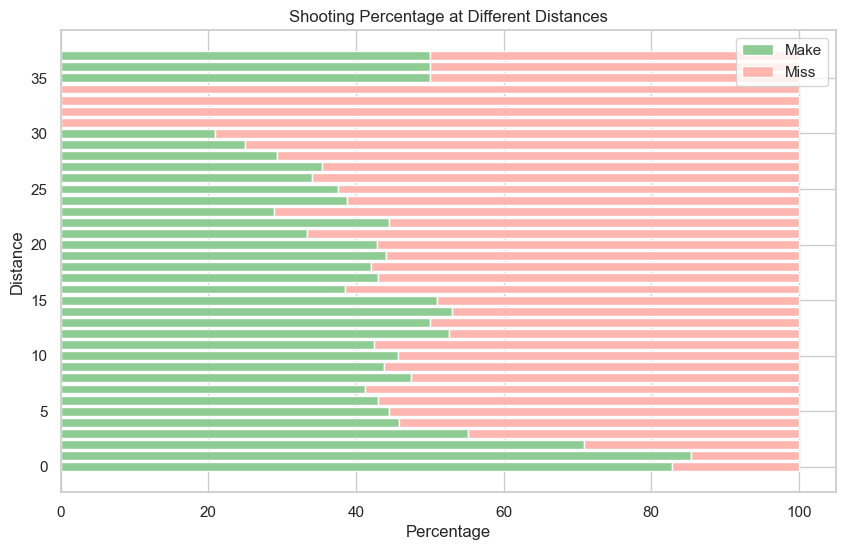

In [23]:
def plot_shooting_percentage(data):
    # Assuming 'Distance' is a column in your dataset, and 'Result' indicates make or miss
    grouped_data = data.groupby(['Distance (ft)', 'Result']).size().unstack(fill_value=0)

    # Calculate percentage of makes and misses at each distance
    total_shots = grouped_data.sum(axis=1)
    make_percentage = (grouped_data['make'] / total_shots) * 100
    miss_percentage = (grouped_data['miss'] / total_shots) * 100

    # Define softer shades of red and green
    soft_green = '#8FCC93'
    soft_red = '#FFB6B0'

    # Plotting the data with softer shades
    plt.figure(figsize=(10, 6))
    plt.barh(make_percentage.index, make_percentage, color=soft_green, label='Make')
    plt.barh(miss_percentage.index, miss_percentage, left=make_percentage, color=soft_red, label='Miss')

    plt.xlabel('Percentage')
    plt.ylabel('Distance')
    plt.title('Shooting Percentage at Different Distances')
    plt.legend()
    plt.show()

plot_shooting_percentage(df)
